In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv('iris.csv')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,15.000000,15.00000,15.000000,15.000000
mean,5.906667,3.06000,3.873333,1.246667
std,0.873798,0.31803,1.891887,0.829687
min,4.600000,2.30000,1.300000,0.200000
25%,5.050000,2.95000,1.450000,0.200000
50%,6.300000,3.10000,4.600000,1.500000
75%,6.500000,3.20000,5.350000,1.850000
max,7.100000,3.60000,6.000000,2.500000


In [4]:
print(df.isnull().sum())
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
X=df.drop('species',axis=1)
y=df['species']

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [17]:
y_pred=model.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Classification_report",classification_report(y_test,y_pred,target_names=le.classes_))

Accuracy 1.0
Classification_report               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         1
  versicolor       1.00      1.00      1.00         1
   virginica       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



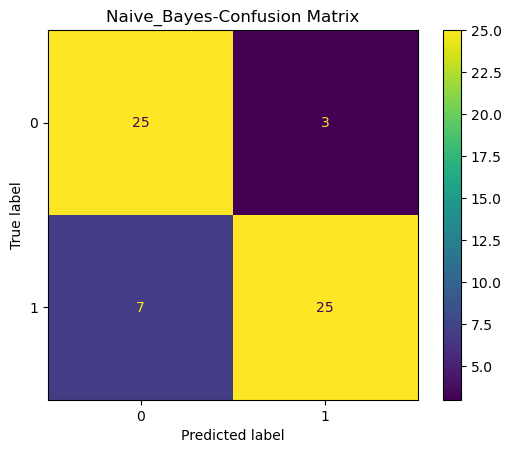

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Naive_Bayes-Confusion Matrix")
plt.show()

In [18]:
df=pd.read_csv('customer_data.csv')
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,35.500000,47.250000,52.500000
std,5.91608,9.795273,27.014372,27.768782
min,1.00000,22.000000,15.000000,5.000000
25%,5.75000,27.750000,22.750000,28.750000
50%,10.50000,33.500000,39.000000,59.000000
75%,15.25000,42.000000,71.250000,77.250000
max,20.00000,55.000000,95.000000,90.000000


In [36]:
from sklearn.preprocessing import StandardScaler
X=df[['Age','AnnualIncome','SpendingScore']]
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,35.500000,47.250000,52.500000
std,5.91608,9.795273,27.014372,27.768782
min,1.00000,22.000000,15.000000,5.000000
25%,5.75000,27.750000,22.750000,28.750000
50%,10.50000,33.500000,39.000000,59.000000
75%,15.25000,42.000000,71.250000,77.250000
max,20.00000,55.000000,95.000000,90.000000


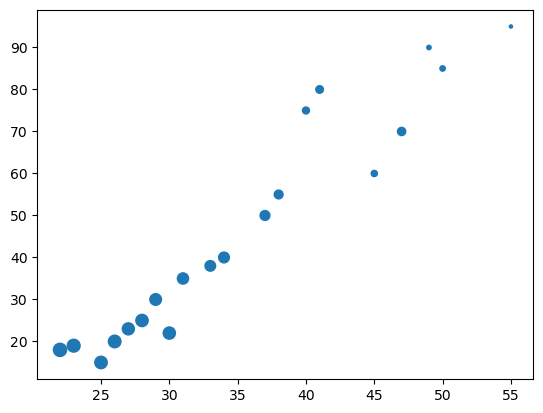

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['AnnualIncome'],df['SpendingScore'])

In [52]:
data=pd.read_csv('example.csv')
data.describe()

,ID,Feature1,Feature2,Feature3
count,10.00000,10.000000,10.00000,10.000000
mean,5.50000,5.600000,3.16000,3.140000
std,3.02765,0.734847,0.48808,1.829511
min,1.00000,4.700000,2.30000,1.300000
25%,3.25000,5.025000,3.00000,1.400000
50%,5.50000,5.450000,3.20000,2.850000
75%,7.75000,6.125000,3.47500,4.925000
max,10.00000,7.000000,3.90000,5.400000


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

label_encoder=LabelEncoder()
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])
data['Label']=label_encoder.fit_transform(data['Label'])
X=data.drop(columns=['Label'])
y=data['Label']
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Model_accurcay",{accuracy*100})

Model_accurcay {100.0}


In [71]:
import numpy as np
new_data=np.array([[5.5,3.0,1.6]])
new_data=scaler.transform(new_data)
prediction=knn.predict(new_data)
prediction_label=label_encoder.inverse_transform(prediction)
print('predicted Label',{prediction_label[0]})

predicted Label {0}


C:\Users\zshoa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


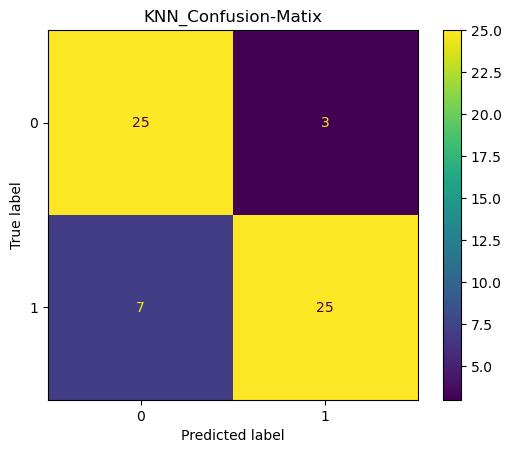

In [115]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("KNN_Confusion-Matix")
plt.show()

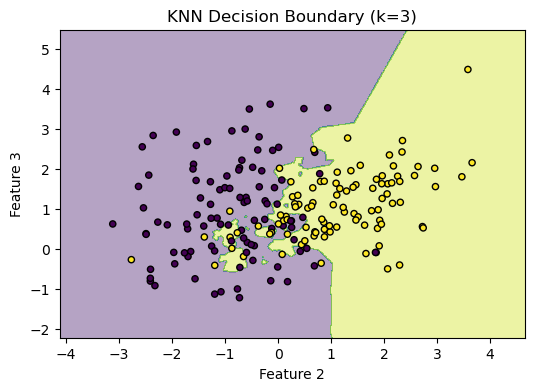

In [90]:
h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title("KNN Decision Boundary (k=3)")
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()

In [99]:
df=pd.read_csv('decision_tree_dataset_with_target.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [91]:
from sklearn.preprocessing import LabelEncoder

inputs=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()
inputs['company']=le_company.fit_transform(inputs['company'])
inputs['job']=le_company.fit_transform(inputs['job'])
inputs['degree']=le_company.fit_transform(inputs['degree'])



In [96]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=None)
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:

predictions=model.predict(X_test)
print('Accuracy',accuracy_score(y_test,predictions)*100,"%")

Accuracy 100.0 %


C:\Users\zshoa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


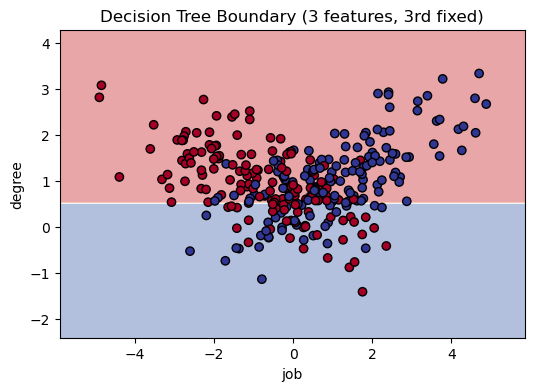

In [120]:
fixed_feature = 2
fixed_value = np.mean(X[:, fixed_feature])

# Use only features 0 and 1 for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Stack grid with fixed third feature
X_grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, fixed_value)]

# Predict on grid
Z = model.predict(X_grid)
Z = Z.reshape(xx.shape)

# 6. Plotting
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Decision Tree Boundary (3 features, 3rd fixed)")
plt.xlabel("job")
plt.ylabel("degree")
plt.show()

In [122]:
df=pd.read_csv('customer_data.csv')
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,35.500000,47.250000,52.500000
std,5.91608,9.795273,27.014372,27.768782
min,1.00000,22.000000,15.000000,5.000000
25%,5.75000,27.750000,22.750000,28.750000
50%,10.50000,33.500000,39.000000,59.000000
75%,15.25000,42.000000,71.250000,77.250000
max,20.00000,55.000000,95.000000,90.000000


In [134]:
from sklearn.preprocessing import StandardScaler
X=df[['Age','AnnualIncome','SpendingScore']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot after the loop
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [140]:
def step_function(x):
    return 1 if x>=0 else 0

In [143]:
class Perceptron:
    def __init__(self,input_size,learning_rate=0.01,epochs=100):
        self.weights=np.zeros(input_size+1)
        self.learning_rate=learning_rate
        self.epochs=epochs
        
    def predict(self,x):
        x_with_bias=np.insert(x,0,1)
        weighted_sum=np.dot(self.weights,x_with_bias)
        return step_function(weighted_sum)
    
    def train(self,X,y):
        for _ in range(self.epochs):
            for xi, target in zip(X,y):
             prediction=self.predict(xi)
            error=target-prediction
            self.weights+=self.learning_rate*error*np,insert(xi,0,1)
        
    

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

df=pd.read_csv('example.csv')
df.describe()

X = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values

# Label encode the target if it's categorical
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step Function
def step_function(x):
    return 1 if x >= 0 else 0

# Fixed Perceptron Class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x_with_bias)
        return step_function(weighted_sum)

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                xi_with_bias = np.insert(xi, 0, 1)
                self.weights += self.learning_rate * error * xi_with_bias

# Load CSV Data
df = pd.read_csv('example.csv')  # Replace with your file path

# Assume last column is the label
X = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values

# Label encode the target if it's categorical
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train perceptron
perceptron = Perceptron(input_size=X.shape[1], learning_rate=0.01, epochs=100)
perceptron.train(X_train, y_train)

# Make predictions
predictions = [perceptron.predict(xi) for xi in X_test]

# Show predictions
for i, pred in enumerate(predictions[:10]):
    print(f"Input: {X_test[i]}, Predicted: {pred}, Actual: {y_test[i]}")


Input: [9.  5.  3.6 1.4], Predicted: 0, Actual: 0
Input: [2.  4.9 3.  1.4], Predicted: 1, Actual: 0


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x_with_bias)
        return step_function(weighted_sum)

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                xi_with_bias = np.insert(xi, 0, 1)
                self.weights += self.learning_rate * error * xi_with_bias

# Visualization function
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([model.predict(point) for point in grid_points])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("SLP Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Load dataset (CSV with 2 features + 1 label column)
df = pd.read_csv('example.csv')

# Feature and label extraction
X = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values

# Label encoding (if necessary)
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SLP
perceptron = Perceptron(input_size=X.shape[1], learning_rate=0.01, epochs=100)
perceptron.train(X_train, y_train)

# Predict and show results
predictions = [perceptron.predict(xi) for xi in X_test]
for i, pred in enumerate(predictions[:10]):
    print(f"Input: {X_test[i]}, Predicted: {pred}, Actual: {y_test[i]}")

# Visualize decision boundary (only if 2D features)
if X.shape[1] == 2:
    plot_decision_boundary(perceptron, X_train, y_train)
else:
    print("Visualization only supports 2D features.")


Input: [9.  5.  3.6 1.4], Predicted: 0, Actual: 0
Input: [2.  4.9 3.  1.4], Predicted: 1, Actual: 0
Visualization only supports 2D features.


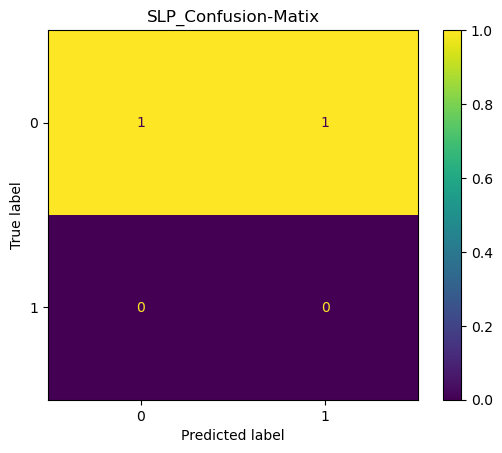

In [158]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("SLP_Confusion-Matix")
plt.show()